In [191]:
#Pandas -> data manipulation; matplotlib,seaborn -> graphical representation of data; statsmodels for building models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [126]:
#Read the data
Startups = pd.read_csv("50_Startups.csv")
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [127]:
#Remove spaces on columns to use for data manipulation
#inplace=True makes changes to existing object permanently not on copy
Startups.rename(columns={'R&D Spend': 'RnD_Spend', 'Marketing Spend': 'Marketing_Spend'}, inplace=True)

In [128]:
#info() method to check data types of variables and null counts
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RnD_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [129]:
#check for missing values
Startups.isna().sum()

RnD_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:>

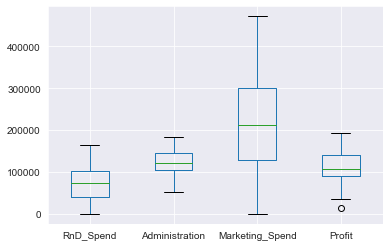

In [151]:
Startups.boxplot()

<AxesSubplot:>

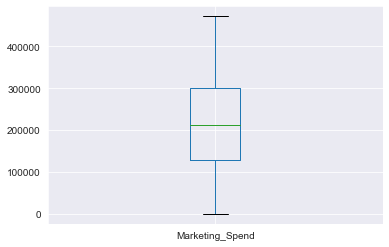

In [198]:
Startups.boxplot('Marketing_Spend')

Market_spend seems to be normal data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

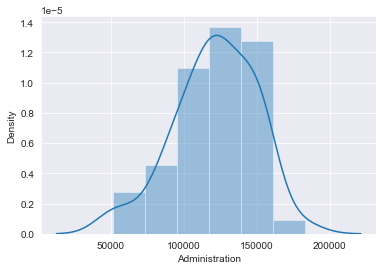

In [199]:
sns.distplot(Startups['Administration'])

<AxesSubplot:>

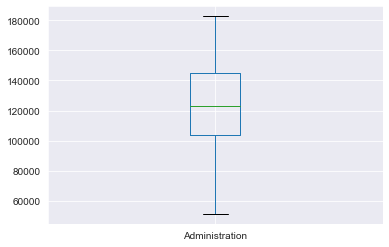

In [200]:
Startups.boxplot('Administration')

Administration column even seems to be normal data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RnD_Spend', ylabel='Density'>

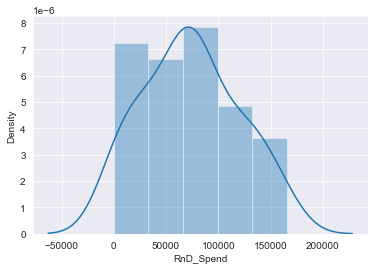

In [201]:
sns.distplot(Startups['RnD_Spend'])

<AxesSubplot:>

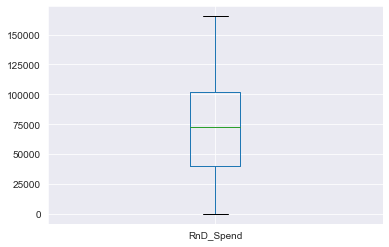

In [202]:
Startups.boxplot('RnD_Spend')

RnD_Spend even seems to be normal. So not applying any transformation on data

In [131]:
#Cpnvert states columns to numerical data to use in model building
#Creating dummy variable for Weather column
Startups_dummies=pd.get_dummies(Startups,columns=['State'])
Startups_dummies

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [132]:
#correlation is to check variable dependency anges from -1(negative corr) to +1(positive corr) zero (No corr). Pearson corr is mostly used, but it cannot 
#tell the difference between dependent variables and independent variables
#0.7+ very strong corr, 0.4 to 0.69 strong corr, +.30 to +.39 Moderate positive relationship in both postive and negative side
Startups_dummies.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
RnD_Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


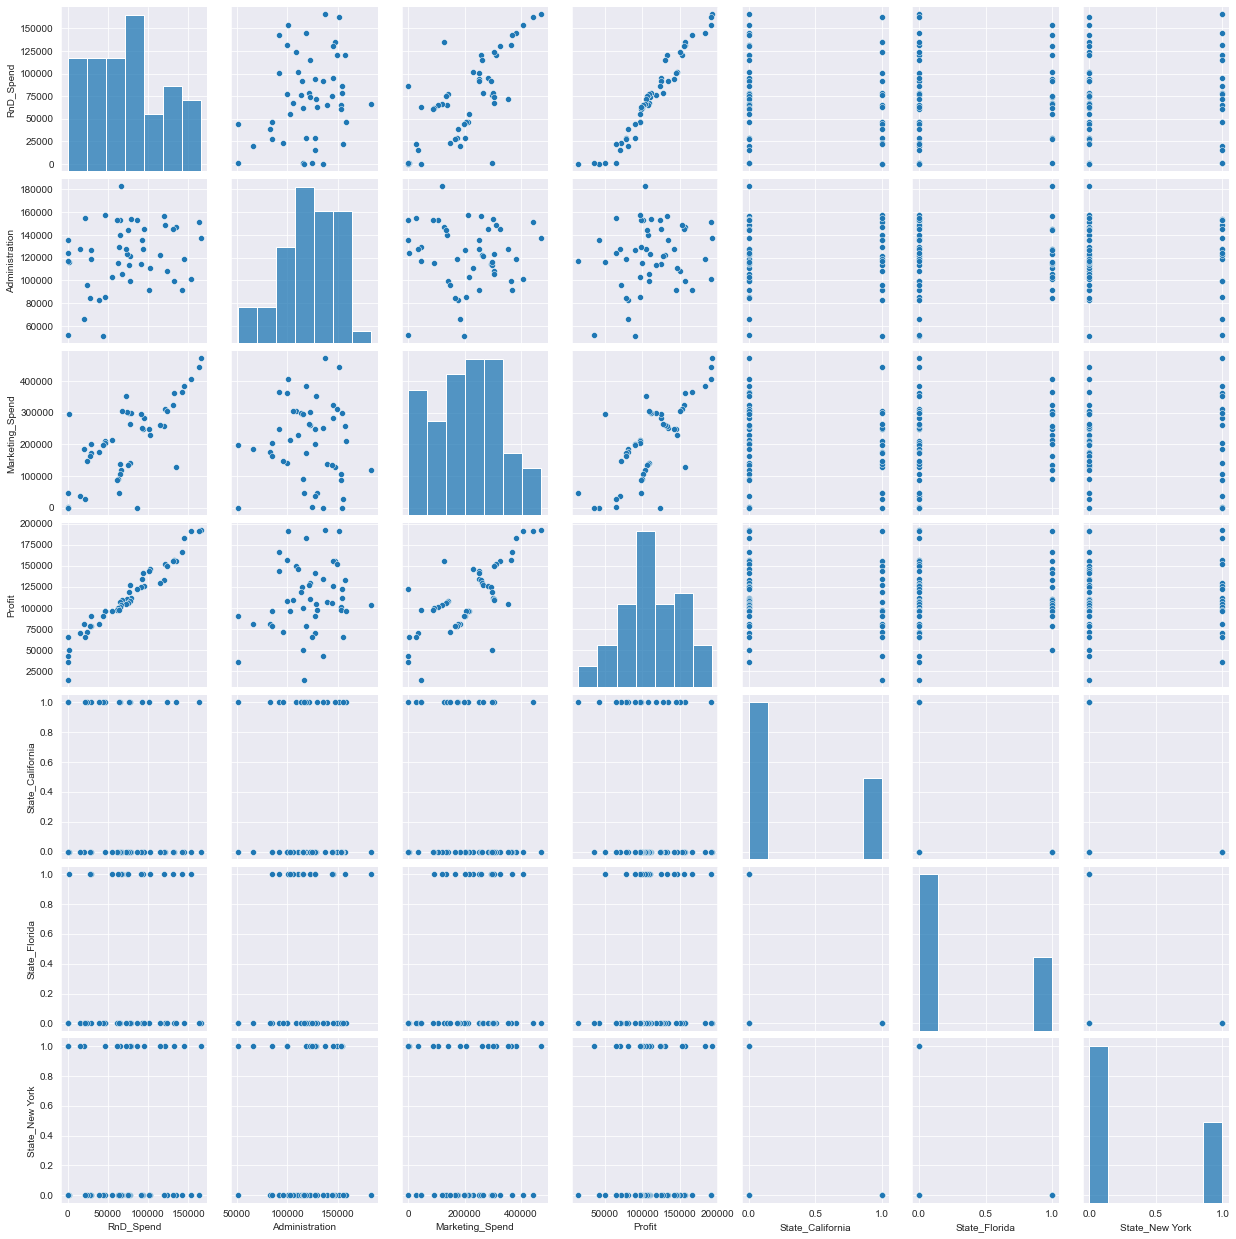

In [134]:
#RnD_Spend, Administration low corr; RnD_Spend, Marketing_Spend strong corr; RnD_Spend, Profit very strong corr
#Administration	, Marketing_Spend low -ve corr; Administration,Profit low corr
#Marketing_Spend, Profit strong corr
#States with others than states does not have a significant corr; But states within states has some corr
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Startups_dummies)
#Plot pairwise relationships in a data-set; sns.pairplot(Startups) this line considers only continous data, but classification of data can be done by categorical data check more info on net

In [135]:
Startups_dummies.columns

Index(['RnD_Spend', 'Administration', 'Marketing_Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [96]:
##OLS ordinary least squares used to find the best fit line with less errors
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit ~ RnD_Spend + Administration + Marketing_Spend + State',data = Startups).fit()

In [97]:
#Coefficients
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
RnD_Spend                0.806023
Administration          -0.027004
Marketing_Spend          0.026980
dtype: float64

In [98]:
#t and p-Values
#T-value : t-statistic measures how many standard errors the coefficient is away from zero. Generally, any t-value greater than +2 or less than – 2 is acceptable. The higher the t-value, the greater the confidence we have in the coefficient as a predictor. Low t-values are indications of low reliability of the predictive power of that coefficient.
#P-value : The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. a p value of 0.0254 is 2.54%. This means there is a 2.54% chance your results could be random. Therefore, the smaller the p-value, the more important (“significant“) your results.let’s say you chose an alpha level of 5% (0.05) A small p (≤ 0.05), reject the null hypothesis, A large p (> 0.05) means the alternate hypothesis is weak,

print(model.tvalues, '\n', model.pvalues)

Intercept             7.280560
State[T.Florida]      0.058970
State[T.New York]    -0.012864
RnD_Spend            17.368580
Administration       -0.517012
Marketing_Spend       1.573889
dtype: float64 
 Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
RnD_Spend            2.578772e-21
Administration       6.077373e-01
Marketing_Spend      1.226769e-01
dtype: float64


In [99]:
#t-value greater than +2 or less than – 2 is acceptable. So except for RnD_Spend rest are not significant from above model
#p-value even low for only RnD_Spend

In [102]:
#Both R2 and the adjusted R2 give you an idea of how many data points fall within the line of the regression equation. 
#R squared value : R2 assumes that every single variable explains the variation in the dependent variable. 
#Adjusted R squared value : adjusted R2 tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable.If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.
#	Adjusted R2 will always be less than or equal to R2.

(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [206]:
model_wit_dummies = smf.ols('Profit ~ RnD_Spend + Administration + Marketing_Spend + State_California + State_Florida + State_NewYork',data = Startups_dummies).fit()
print('T & P values')
print(model_wit_dummies.tvalues, '\n', model_wit_dummies.pvalues)
print('rsquared & rsquared_adj')
(model_wit_dummies.rsquared,model_wit_dummies.rsquared_adj)

T & P values
Intercept            7.417409
RnD_Spend           17.368580
Administration      -0.517012
Marketing_Spend      1.573889
State_California     5.099242
State_Florida        4.654306
State_NewYork        5.007401
dtype: float64 
 Intercept           2.807645e-09
RnD_Spend           2.578772e-21
Administration      6.077373e-01
Marketing_Spend     1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_NewYork       9.409010e-06
dtype: float64
rsquared & rsquared_adj


(0.9507524843355148, 0.945156175737278)

In [103]:
#Adj R square & R square are nearly equal (No much diff) good model
Startups.columns

Index(['RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [104]:
#Plot simple linear regression between 2 variables to elimate columns that are not significant
profit_RnD=smf.ols('Profit ~ RnD_Spend',data = Startups).fit()  
#t and p-Values
print(profit_RnD.tvalues, '\n', profit_RnD.pvalues)  

Intercept    19.320288
RnD_Spend    29.151139
dtype: float64 
 Intercept    2.782697e-24
RnD_Spend    3.500322e-32
dtype: float64


In [105]:
#Profit ~ RnD_Spend are significant in T & P values

In [106]:
#R squared values
(profit_RnD.rsquared,profit_RnD.rsquared_adj)

(0.9465353160804392, 0.9454214684987816)

In [107]:
#Profit ~ RnD_Spend are significant in R $ adj.R

In [108]:
profit_Admin=smf.ols('Profit ~ Administration',data = Startups).fit()  
#t and p-Values
print(profit_Admin.tvalues, '\n', profit_Admin.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [109]:
#Profit ~ Administration is not significant in T & P values

In [110]:
# R squared values
print(profit_Admin.rsquared,profit_Admin.rsquared_adj)

0.04028714077757245 0.020293122877105274


In [111]:
print("R-square & Adj-R-square are very less. Administration can be removed for Model building here")

R-square & Adj-R-square are very less. Administration can be removed for Model building here


In [112]:
profit_Market_spend=smf.ols('Profit ~ Marketing_Spend',data = Startups).fit()  
#t and p-Values
print(profit_Market_spend.tvalues, '\n', profit_Market_spend.pvalues) 

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [113]:
#Profit ~ Marketing_Spend T & P values are good here

In [114]:
#R squared values
print(profit_Market_spend.rsquared,profit_Market_spend.rsquared_adj)

0.5591535746115515 0.5499692740826254


In [115]:
print("R-square & Adj-R-square are Moderate. Market Spending can be included for model coz more than 0.5")

R-square & Adj-R-square are Moderate. Market Spending can be included for model coz more than 0.5


In [116]:
Startups.columns

Index(['RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [139]:
Startups_dummies.columns

Index(['RnD_Spend', 'Administration', 'Marketing_Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [142]:
Startups_dummies.rename(columns={'State_New York': 'State_NewYork'}, inplace=True)

In [144]:
Startups_dummies

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [146]:
profit_states=smf.ols('Profit ~ State_California + State_Florida + State_NewYork', data = Startups_dummies).fit()  
#t and p-Values
print(profit_states.tvalues, '\n', profit_states.pvalues) 

Intercept           19.494630
State_California     2.414169
State_Florida        4.135022
State_NewYork        3.615538
dtype: float64 
 Intercept           3.682016e-24
State_California    1.971870e-02
State_Florida       1.452750e-04
State_NewYork       7.288556e-04
dtype: float64


In [ ]:
#States has good T & P values wrt Profit
#excluding states and Administration build a model to check regression

In [117]:
profit_Rnd_MarketSpend=smf.ols('Profit ~ RnD_Spend + Marketing_Spend',data = Startups).fit()  
print(profit_Rnd_MarketSpend.tvalues, '\n', profit_Rnd_MarketSpend.pvalues)  

Intercept          17.463582
RnD_Spend          19.265555
Marketing_Spend     1.927052
dtype: float64 
 Intercept          3.504062e-22
RnD_Spend          6.040433e-24
Marketing_Spend    6.003040e-02
dtype: float64


In [118]:
#Profit ~ RnD_Spend + Marketing_Spend T & P values are good bit Market_spend t-vale is 1.9 which good value is +2 and p-value 0.06 and good value would be <= 0.05

In [119]:
#R squared values
(profit_Rnd_MarketSpend.rsquared,profit_Rnd_MarketSpend.rsquared_adj)

(0.9504503015559763, 0.9483418037498477)

In [120]:
print("R-square & Adj-R-Square are high so, we can consider this model")


R-square & Adj-R-Square are high so, we can consider this model


In [148]:
profit_Rnd_MarketSpend_stat=smf.ols('Profit ~ RnD_Spend + Marketing_Spend + State_California + State_Florida + State_NewYork',data = Startups_dummies).fit()  
print(profit_Rnd_MarketSpend_stat.tvalues, '\n', profit_Rnd_MarketSpend_stat.pvalues)  

Intercept           16.782480
RnD_Spend           18.771167
Marketing_Spend      1.842164
State_California     6.129585
State_Florida        5.458654
State_NewYork        5.878963
dtype: float64 
 Intercept           5.420201e-21
RnD_Spend           6.509785e-23
Marketing_Spend     7.204640e-02
State_California    2.004515e-07
State_Florida       1.970877e-06
State_NewYork       4.720949e-07
dtype: float64


In [149]:
#R squared values
(profit_Rnd_MarketSpend_stat.rsquared,profit_Rnd_MarketSpend_stat.rsquared_adj)

(0.950453304509085, 0.9460491537987815)

In [150]:
#(profit_Rnd_MarketSpend_stat.rsquared,profit_Rnd_MarketSpend_stat.rsquared_adj)
#(0.950453304509085, 0.9460491537987815)
#------------------------------------------------------------
#(profit_Rnd_MarketSpend.rsquared,profit_Rnd_MarketSpend.rsquared_adj)
#(0.9504503015559763, 0.9483418037498477)
#-------------------------------------------------------------
#(0.9507524843355148, 0.945156175737278)
print('From above values profit_Rnd_MarketSpend has high Adj R^2. so we can consider this model')

From above values profit_Rnd_MarketSpend has high Adj R^2. so we can consider this model


In [121]:
#Now let us check VIF to see what varible is highly influencing the model

In [122]:
print("Calculating VIF; Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. When two or more independent variables are closely related or measure almost the same thing, then the underlying effect that they measure is being accounted for twice (or more) across the variables. It becomes difficult or impossible to say which variable is really influencing the independent variable")

Calculating VIF; Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. When two or more independent variables are closely related or measure almost the same thing, then the underlying effect that they measure is being accounted for twice (or more) across the variables. It becomes difficult or impossible to say which variable is really influencing the independent variable


In [123]:
#A rule of thumb for interpreting the variance inflation factor:

# 1 = not correlated.
# Between 1 and 5 = moderately correlated.
# Greater than 5 = highly correlated.


In [124]:
#'RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'
rsq_RnD = smf.ols('RnD_Spend ~ Administration + Marketing_Spend + State',data=Startups).fit().rsquared  
vif_RnD = 1/(1-rsq_RnD) # 16.33
vif_RnD

2.4955109215494433

In [32]:
rsq_Admin = smf.ols('Administration ~ RnD_Spend + Marketing_Spend + State',data=Startups).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin) # 564.98
vif_Admin

1.177766050899384

In [33]:
rsq_MarketSpend = smf.ols('Marketing_Spend ~ RnD_Spend + Administration + State',data=Startups).fit().rsquared    
vif_MarketSpend = 1/(1-rsq_MarketSpend) #  564.84
vif_MarketSpend

2.4167967566863946

In [34]:
rsq_state = smf.ols('State ~ RnD_Spend + Administration + Marketing_Spend',data=Startups).fit().rsquared  
vif_state = 1/(1-rsq_state) #  16.35
vif_state

ValueError: endog has evaluated to an array with multiple columns that has shape (50, 3). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [35]:
# Storing vif values in a data frame
d1 = {'Variables':['RnD_Spend', 'Administration', 'Marketing_Spend'],'VIF':[vif_RnD,vif_Admin,vif_MarketSpend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RnD_Spend,2.495511
1,Administration,1.177766
2,Marketing_Spend,2.416797


# Residual Analysis

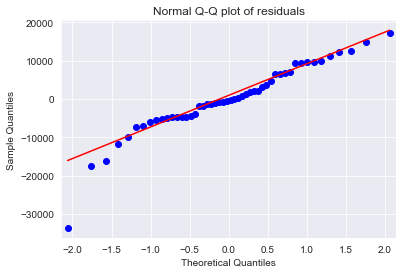

In [152]:
#
#Residuals are differences between the one-step-predicted output from the model and the measured output from the validation data set
#Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
qqplot=sm.qqplot(profit_Rnd_MarketSpend.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [153]:
list(np.where(profit_Rnd_MarketSpend.resid<-20000))

[array([49], dtype=int64)]

In [154]:
profit_Rnd_MarketSpend.resid

0      -538.628625
1      2017.400520
2      9645.011903
3      9460.681158
4     -4939.683218
5     -5888.190812
6     -1905.620454
7     -4703.138877
8      -106.033673
9     -4583.853935
10    11110.035276
11     9620.529925
12    12367.123421
13     6495.144535
14   -17589.841797
15   -16115.675433
16     9967.038152
17    -5459.074732
18    -4615.298828
19     6960.441667
20     1823.137908
21    -7071.150709
22    -4638.134639
23    -1152.195217
24    -4000.147151
25     4791.430758
26    -5257.252884
27    -9970.295150
28      157.367240
29    -1435.784090
30      852.370438
31     -830.988854
32    -1436.822254
33     -821.810445
34     6450.158781
35     6703.015715
36    14883.956088
37     1975.125482
38    12597.741677
39    -1919.055275
40     3190.853969
41     3684.941295
42     1264.239426
43     9368.747148
44     -289.399308
45    17096.506020
46    -7419.050859
47    -4416.134221
48   -11734.242602
49   -33645.494462
dtype: float64

# Residual Plot for Homoscedasticity

In [ ]:
#The assumption of homoscedasticity (meaning “same variance”) is central to linear regression models.  Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables.  Heteroscedasticity (the violation of homoscedasticity) is present when the size of the error term differs across values of an independent variable. 

In [155]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

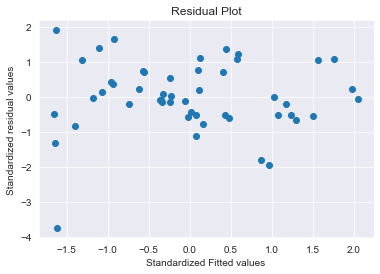

In [156]:
plt.scatter(get_standardized_values(profit_Rnd_MarketSpend.fittedvalues), #Fitted values means Predicted values
            get_standardized_values(profit_Rnd_MarketSpend.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
#Above graph shows the data has Heteroskedasticity

# Residual Vs Regressors

In [ ]:
#model is build with State column
#profit_Rnd_MarketSpend is built without State column

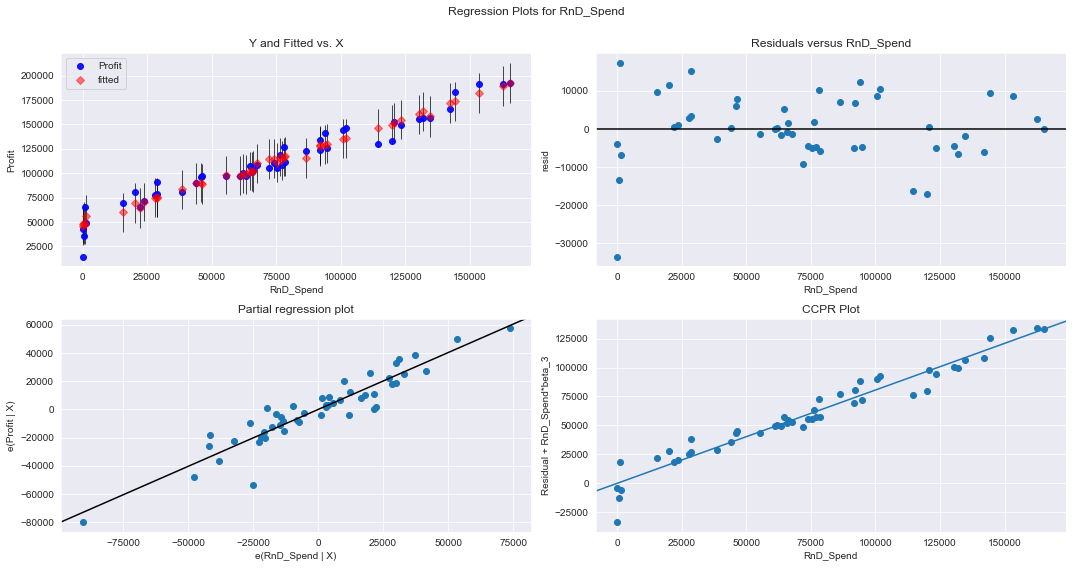

In [42]:
#'RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RnD_Spend", fig=fig)
plt.show()

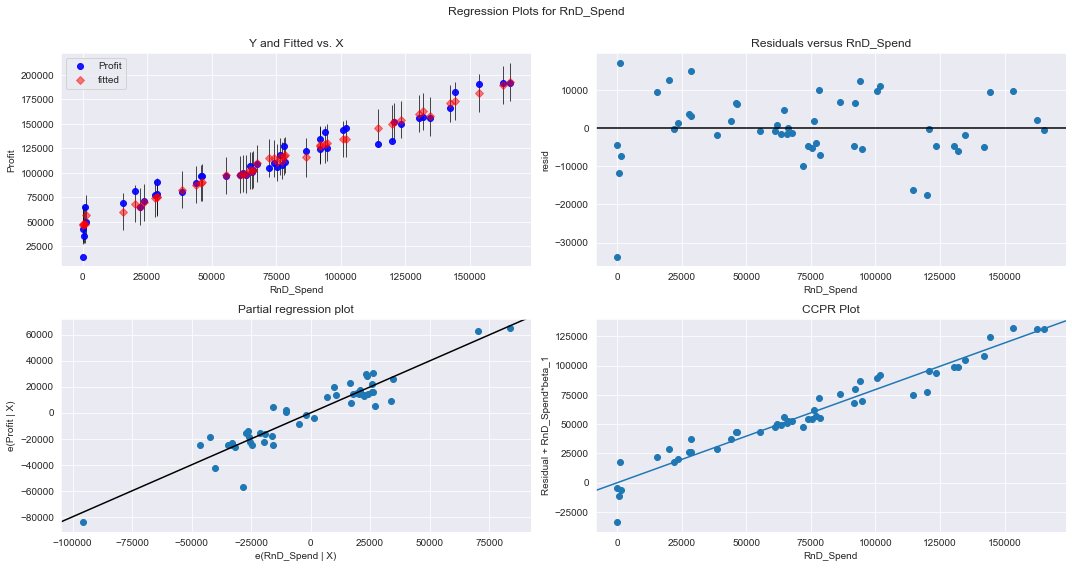

In [158]:
#profit_Rnd_MarketSpend
#'RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(profit_Rnd_MarketSpend, "RnD_Spend", fig=fig)
plt.show()

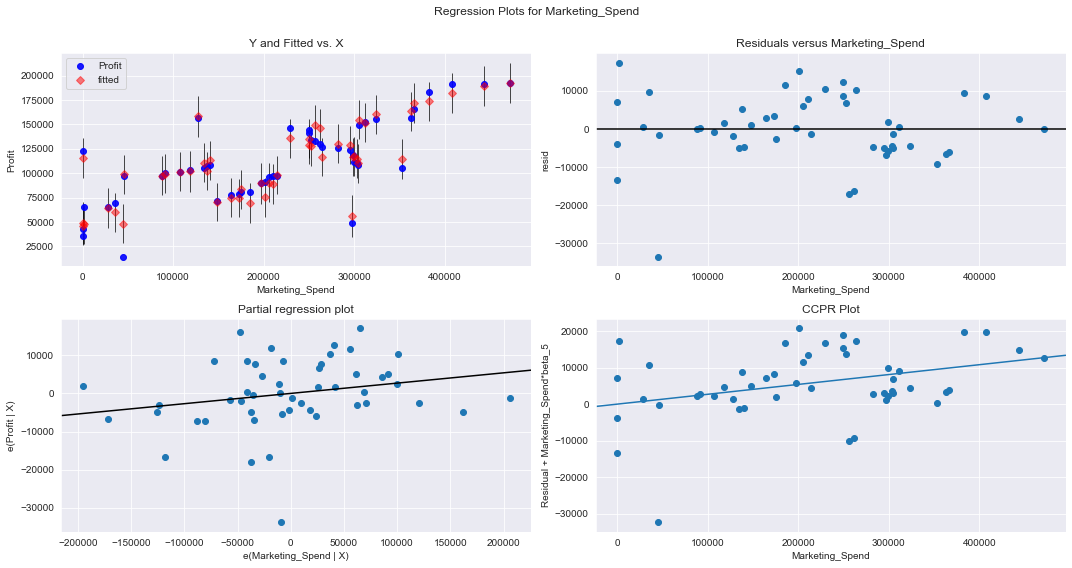

In [43]:
#'RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

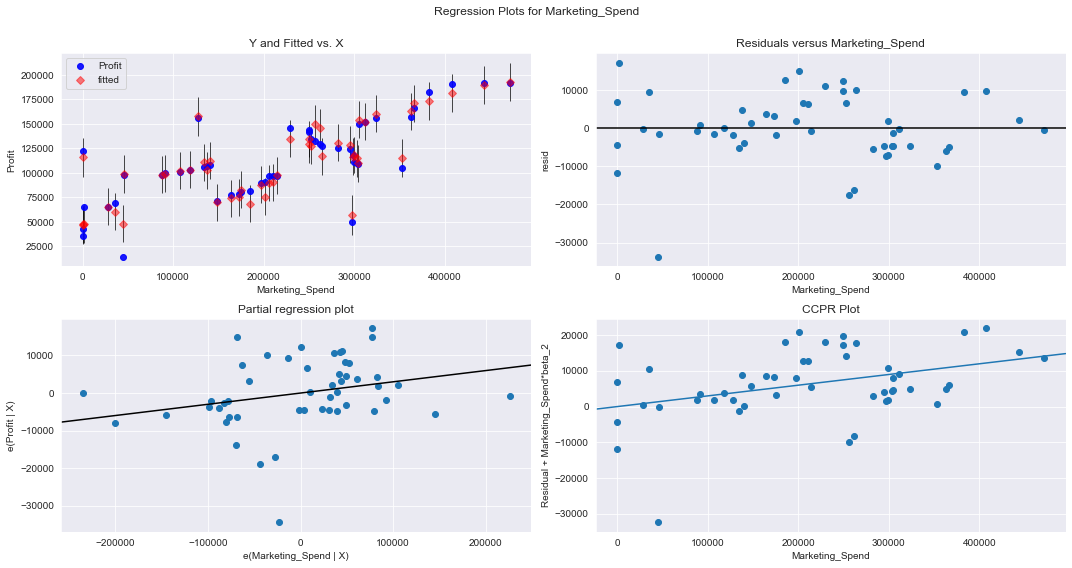

In [159]:
#profit_Rnd_MarketSpend
#'RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(profit_Rnd_MarketSpend, "Marketing_Spend", fig=fig)
plt.show()

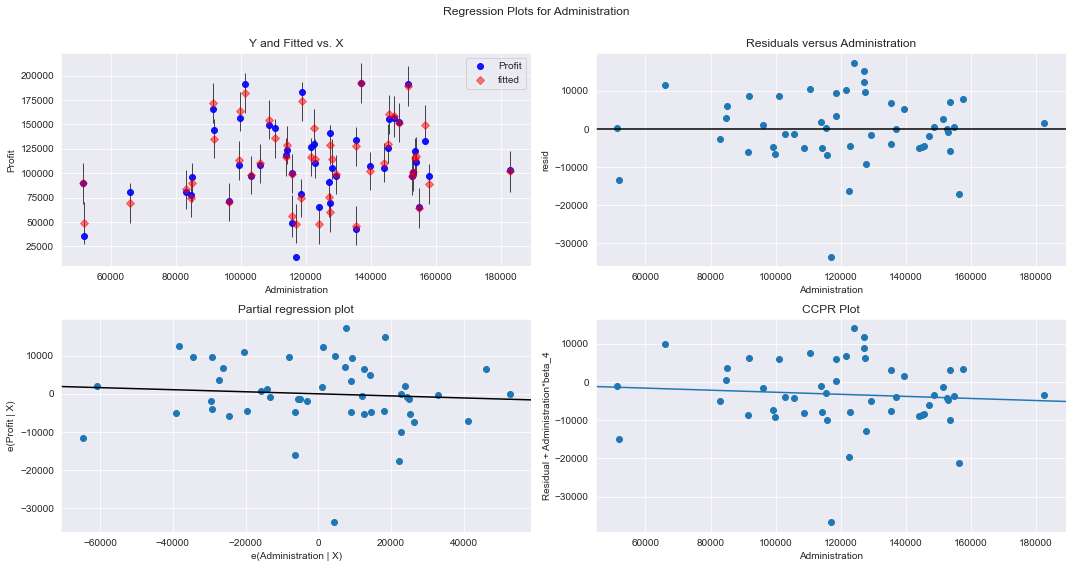

In [44]:
#'RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

In [160]:
#profit_Rnd_MarketSpend
#'RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(profit_Rnd_MarketSpend, "Administration", fig=fig)
plt.show()

ValueError: 'Administration' is not in list

<Figure size 1080x576 with 0 Axes>

In [ ]:
#'Administration' coumn is removed from profit_Rnd_MarketSpend

# Model Deletion Diagnostics
Detecting Influencers/Outliers
Cook’s Distance

In [47]:
#Cooks Distance - Cook’s Distance is an estimate of the influence of a data point. It takes into account both the leverage and residual of each observation. Cook’s Distance is a summary of how much a regression model changes when the ith observation is removed.
#a general rule of thumb is to investigate any point that is more than 3x the mean of all the distances 
model_influence = profit_Rnd_MarketSpend.get_influence()
(c, _) = model_influence.cooks_distance

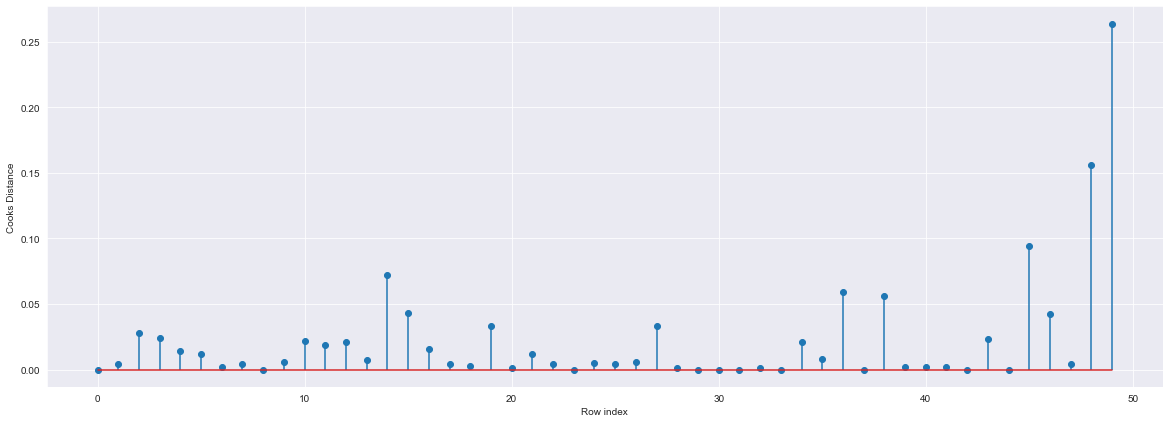

In [162]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Startups)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [163]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2639594358692202)

# High Influence points

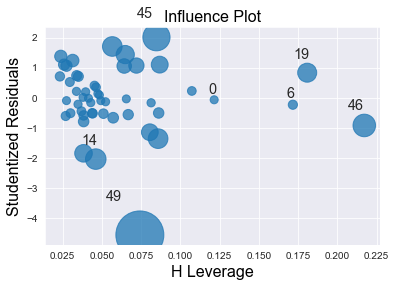

In [164]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(profit_Rnd_MarketSpend)
plt.show()

In [51]:
Startups.shape

(50, 5)

In [53]:
k = Startups.shape[1]
n = Startups.shape[0]
print(k,n)

5 50


In [54]:
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

# From the above plot, it is evident that data point 49, 46 and 45 are the influencers

In [165]:
Startups[Startups.index.isin([45, 46, 49])]

,RnD_Spend,Administration,Marketing_Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
49,0.00,116983.80,45173.06,California,14681.40


# Improving the model

In [166]:
#Load the data
Startups_new = pd.read_csv("50_Startups.csv")

In [167]:
Startups_new

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [168]:
Startups_new.rename(columns={'R&D Spend': 'RnD_Spend', 'Marketing Spend': 'Marketing_Spend'}, inplace=True)

In [169]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Startups_discarded_new=Startups_new.drop(Startups_new.index[[45,46,49]],axis=0).reset_index()

In [170]:
Startups_discarded_new

,index,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [61]:
#Drop the original index
Startups_discarded_new=Startups_discarded_new.drop(['index'],axis=1)
Startups_discarded_new

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data. 
Lower AIC scores are better, and AIC penalizes models that use more parameters.

In [171]:
#Exclude variable "Administration" and generate R-Squared and AIC values
#'RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'
final_ml_RnD_MS= smf.ols('Profit ~ RnD_Spend + Marketing_Spend',data = Startups_discarded_new).fit()
(final_ml_RnD_MS.rsquared,final_ml_RnD_MS.aic)

(0.9620789282762134, 973.4186407443044)

In [172]:
(final_ml_RnD_MS.rsquared,final_ml_RnD_MS.aic,final_ml_RnD_MS.rsquared_adj)

(0.9620789282762134, 973.4186407443044, 0.9603552431978595)

In [63]:
#Exclude variable "Market_spend" and generate R-Squared and AIC values
#'RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'
final_ml_RnD= smf.ols('Profit ~ RnD_Spend + Administration',data = Startups_discarded_new).fit()
(final_ml_RnD.rsquared,final_ml_RnD.aic)

(0.962171549292245, 971.7555525307087)

In [64]:
#Exclude variable "RnD" and generate R-Squared and AIC values
#'RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'
final_ml_MarketSpend= smf.ols('Profit ~ Marketing_Spend + Administration',data = Startups_discarded_new).fit()
(final_ml_MarketSpend.rsquared,final_ml_MarketSpend.aic)

(0.5437715694257832, 1088.7823633261198)

In [75]:
#Exclude variable "States" and generate R-Squared and AIC values
#'RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'
final_ml_MarketSpend_RnD= smf.ols('Profit ~ Marketing_Spend + Administration + RnD_Spend',data = Startups_discarded_new).fit()
(final_ml_MarketSpend_RnD.rsquared,final_ml_MarketSpend_RnD.aic)
#AIC -> AIC is a single number score that can be used to determine which of multiple models is most likely to be the best model for a given dataset. 
#A lower AIC score is better

(0.9640877256125092, 971.3123824689237)

In [173]:
#Have all variables and generate R-Squared and AIC values
#'RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'
final_ml_All = smf.ols('Profit ~ Marketing_Spend + Administration + RnD_Spend + State',data = Startups_discarded_new).fit()
(final_ml_All.rsquared,final_ml_All.aic, final_ml_All.rsquared_adj)
#AIC -> AIC is a single number score that can be used to determine which of multiple models is most likely to be the best model for a given dataset. 
#A lower AIC score is better

(0.9633500558096941, 977.8161741374327, 0.9588805504206325)

# Comparing above R-Square and AIC values, model 'final_ml_RnD_MS' has high R- square and low AIC value 

In [174]:
#Cooks Distance - Cook’s Distance is an estimate of the influence of a data point. It takes into account both the leverage and residual of each observation. Cook’s Distance is a summary of how much a regression model changes when the ith observation is removed.
#a general rule of thumb is to investigate any point that is more than 3x the mean of all the distances 
model_influence_RnD_MS = final_ml_RnD_MS.get_influence()
(c_V, _) = model_influence_RnD_MS.cooks_distance

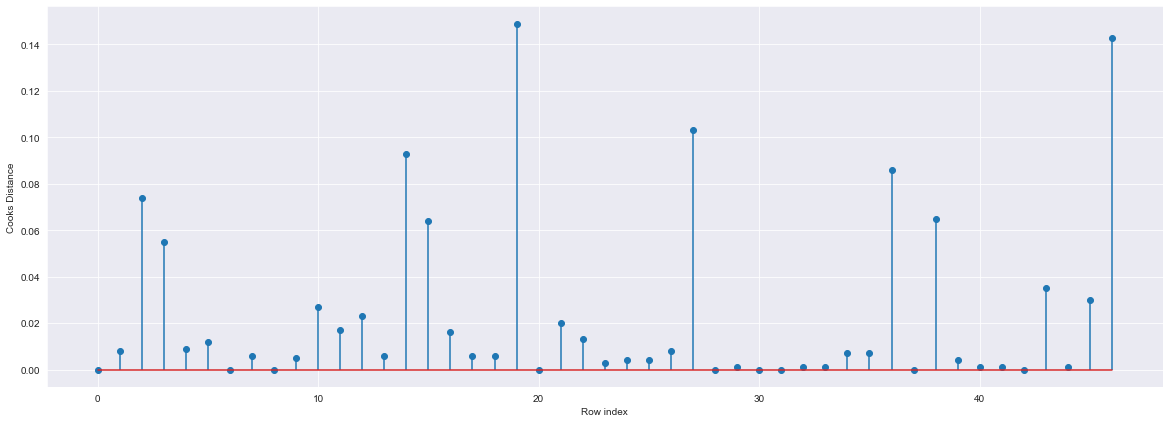

In [175]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Startups_discarded_new)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [176]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(19, 0.14945540689515482)

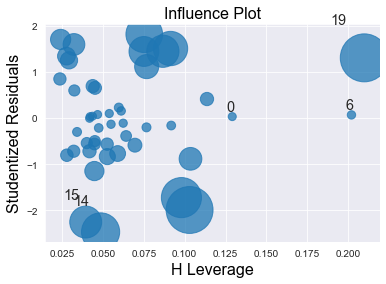

In [177]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_ml_RnD_MS)
plt.show()

In [178]:
#Drop 19,14,15 observations
Startups_discarded_new_1=Startups_discarded_new.drop(Startups_discarded_new.index[[14,15,19]],axis=0).reset_index()
Startups_discarded_new_1

,level_0,index,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,9,123334.88,108679.17,304981.62,California,149759.96


In [179]:
Startups_discarded_new_1 = Startups_discarded_new_1.drop(['index','level_0'],axis=1)
Startups_discarded_new_1

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [180]:
final_ml_RnD_MS_del = smf.ols('Profit ~ RnD_Spend + Marketing_Spend',data = Startups_discarded_new_1).fit()
(final_ml_RnD_MS_del.rsquared,final_ml_RnD_MS_del.aic,final_ml_RnD_MS_del.rsquared_adj)

(0.9718569345006571, 901.0894687336836, 0.9704841020372745)

In [182]:
#we got very goog AIC 901 from 973.4186407443044
#Cooks Distance - Cook’s Distance is an estimate of the influence of a data point. It takes into account both the leverage and residual of each observation. Cook’s Distance is a summary of how much a regression model changes when the ith observation is removed.
#a general rule of thumb is to investigate any point that is more than 3x the mean of all the distances 
model_influence_RnD_MS = final_ml_RnD_MS_del.get_influence()
(c_V, _) = model_influence_RnD_MS.cooks_distance
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))
#(19, 0.14945540689515482)

(24, 0.17262434677329336)

# Since the value is <1 , we can stop the diagnostic process and finalize the model

In [183]:
model_influence_RnD_MS.cooks_distance

(array([4.45832956e-03, 1.16586758e-03, 7.02033562e-02, 5.34991798e-02,
        2.24386114e-02, 2.66904492e-02, 8.30776639e-04, 1.48702734e-02,
        3.61861018e-04, 1.20625224e-02, 3.70062923e-02, 2.06351357e-02,
        2.83293755e-02, 6.21805722e-03, 1.74630761e-02, 1.09245313e-02,
        1.03212724e-02, 8.69752883e-06, 3.27722800e-02, 2.22568750e-02,
        7.37940515e-03, 8.20831885e-03, 5.60618796e-03, 1.42106165e-02,
        1.72624347e-01, 2.49482353e-05, 1.55706320e-03, 2.33393496e-04,
        6.82679919e-04, 1.59015004e-03, 1.80434529e-03, 8.16388545e-03,
        8.89104111e-03, 1.14961571e-01, 8.47434677e-06, 8.96566811e-02,
        5.19789242e-03, 7.73658907e-04, 1.61453908e-03, 2.21662802e-04,
        5.25583394e-02, 7.66176390e-04, 3.13221046e-02, 1.70631319e-01]),
 array([0.99958293, 0.99994405, 0.97552905, 0.98345985, 0.99537166,
        0.99402013, 0.99996633, 0.99748481, 0.99999032, 0.99815743,
        0.99033334, 0.99591121, 0.99347125, 0.99931421, 0.99680707,
  

In [184]:
model_influence_RnD_MS.cooks_distance[0].size

44

In [185]:
#Check the accuracy of the mode
#'RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'
final_ml_RnD_MarketSpend= smf.ols('Profit ~ RnD_Spend + Marketing_Spend',data = Startups_discarded_new_1).fit()

In [186]:
(final_ml_RnD_MarketSpend.rsquared, final_ml_RnD_MarketSpend.aic)

(0.9718569345006571, 901.0894687336836)

# Predicting for new data

In [187]:
Startups_discarded_new_1

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [188]:
#New data for prediction
new_data=pd.DataFrame({'RnD_Spend':162597.70,"Marketing_Spend":443898.53},index=[1])
final_ml_RnD_MarketSpend.predict(new_data)

1    190805.769672
dtype: float64

In [189]:
final_ml_RnD_MarketSpend.predict(Startups_discarded_new_1.iloc[0:5,])

0    194041.381388
1    190805.769672
2    182323.771435
3    174360.216159
4    171934.845423
dtype: float64

In [190]:
pred_profit = final_ml_RnD_MarketSpend.predict(Startups_discarded_new_1)
pred_profit

0     194041.381388
1     190805.769672
2     182323.771435
3     174360.216159
4     171934.845423
5     163940.495409
6     156589.734179
7     161159.749440
8     153170.139224
9     155049.212232
10    135539.320385
11    135413.272672
12    130185.457871
13    128861.062221
14    118588.666934
15    132111.405349
16    130373.214347
17    118616.748896
18    120300.952955
19    117067.804729
20    112160.472503
21    112867.145109
22    103249.488083
23    111286.821189
24    117622.860167
25    103518.417004
26    102732.962259
27     99314.516433
28     98537.994956
29     98590.070610
30     99285.389804
31     92163.070852
32     91634.129641
33     78125.121001
34     89798.937678
35     71006.255746
36     84677.953669
37     77055.523344
38     76058.844087
39     72129.247053
40     61355.627443
41     66193.108074
42     48011.737547
43     48428.264831
dtype: float64

In [ ]:
#Check categorical data of states here